# Lab 1.1 - Time Series Exploration

In this laboratory you will learn how to explore time series data. Time series data are extremely common in energy applications since data gathered from monitoring infrastructures are organized according to this approach.

Welcome to the Python laboratory session on time series exploration methods! Time series data is found in a variety of domains, including finance, economics, weather forecasting, and energy applications! Exploring time series data can provide valuable insights and help us make informed decisions.

In this session, we will explore various methods for analyzing and visualizing time series data using Python.

By the end of this session, you will have a solid understanding of various time series exploration methods and be able to apply them to your own datasets. So, let's get started!

### Importing Libraries and Data

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

data = pd.read_csv("data/LoadTimeSeriesData.csv", parse_dates=['timestamp'])
print(data.head)

<bound method NDFrame.head of                timestamp     power
0    2017-01-01 00:00:00  502.7056
1    2017-01-01 01:00:00  517.0394
2    2017-01-01 02:00:00  535.8098
3    2017-01-01 03:00:00  494.5149
4    2017-01-01 04:00:00  503.0469
...                  ...       ...
8755 2017-12-31 19:00:00  258.6903
8756 2017-12-31 20:00:00  285.9927
8757 2017-12-31 21:00:00  267.5636
8758 2017-12-31 22:00:00  269.6113
8759 2017-12-31 23:00:00  268.2462

[8760 rows x 2 columns]>


### Plotting the timeseries

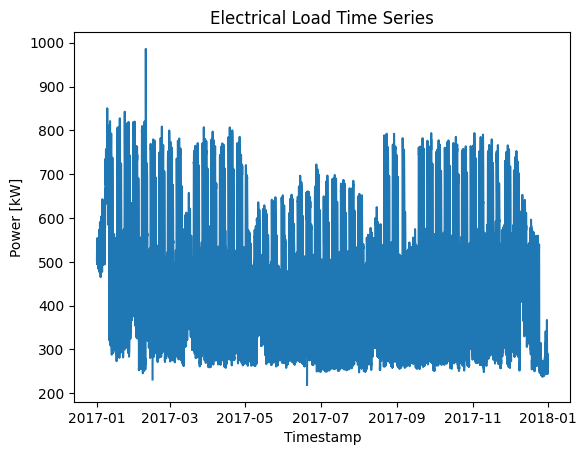

In [2]:
plt.plot(data["timestamp"], data["power"])

# Impostazione delle etichette degli assi e del titolo del grafico
plt.xlabel("Timestamp")
plt.ylabel("Power [kW]")
plt.title("Electrical Load Time Series")

# Visualizzazione del grafico
plt.show()

### Understanding power and energy conversions.

Energy is the integral of Power over time. Power is measured in **Watts** [W]. Energy is measured in **Joule** [J] or in **Watthour** [Wh].

The Watt-hour (Wh) represents the energy consumed or produced by a device operating at a power of 1 watt for one hour. In other words, 1 Wh is the energy produced or consumed by a device operating at a power of 1 watt for one hour.

The Joule (J), on the other hand, is the unit of energy in the International System of Units. One Joule corresponds to the amount of work required to move an object weighing one Newton by one meter, applying a force of one Newton in the same direction as the movement.

## Time series visualizations

### Introduction to Carpet Plot Visualization for Time Series Data

A carpet plot is a visualization technique for time series data that shows multiple individual time series as a "carpet" of colored blocks, where each row represents a different time series and each column represents a time step. The color of each block represents the value of the time series at that time step, and the blocks are arranged so that consecutive time steps are shown from left to right.

Carpet plots are useful for visualizing large collections of time series data, as they allow patterns and trends to be easily identified across multiple time series. They can also be used to identify outliers or unusual patterns in the data.

One advantage of carpet plots over line plots or scatter plots is that they allow for visualizing time series data that may have irregular sampling rates or varying lengths, as each time series can have its own unique length and sampling rate. Carpet plots can also be used to visualize multivariate time series data by using different colors to represent different variables or dimensions.

In Python, carpet plots can be created using various libraries such as Matplotlib, Seaborn, or Plotly. These libraries offer different customization options for creating carpet plots, such as adjusting the color scheme, adding annotations, or smoothing the data.


Text(120.72222222222221, 0.5, 'Date')

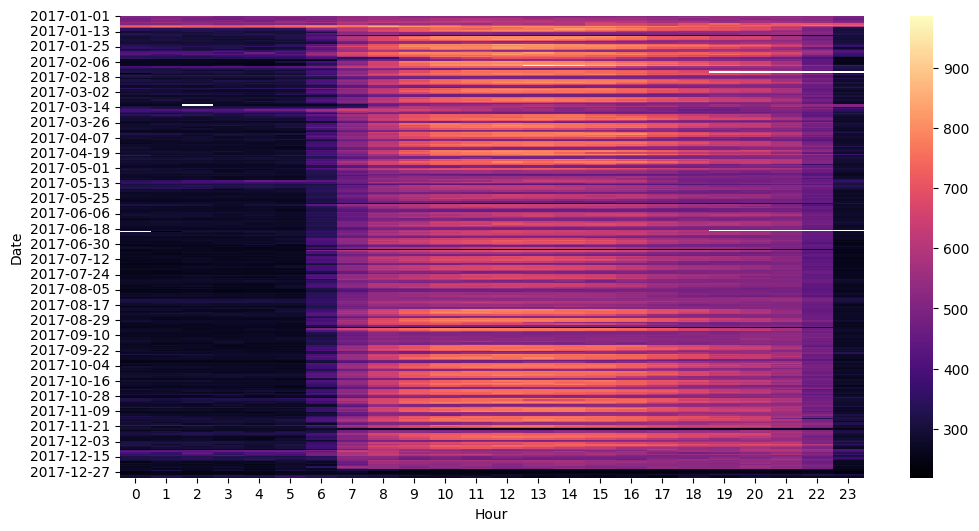

In [25]:
# Extract the hour of the day from the datetime column
data['hour'] = data['timestamp'].dt.hour
data['date'] = data['timestamp'].dt.date

# Create a pivot table to reshape the data
df_pivot = data.pivot(index='date', columns='hour', values='power')

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_pivot, cmap='magma', ax=ax)

# impostazione delle etichette degli assi
ax.set_xlabel('Hour')
ax.set_ylabel('Date')

### Introduction to Boxplot visualization for time series data

Boxplots, also known as box-and-whisker plots, are a popular data visualization technique used to summarize the distribution of a dataset. The boxplot provides a quick and intuitive way to visualize the median, quartiles, and extreme values of a dataset, making it a valuable tool for exploratory data analysis and statistical inference.

The boxplot consists of a box, which represents the interquartile range (IQR) of the dataset, and two whiskers that extend from the box to the minimum and maximum values that are within 1.5 times the IQR. Data points outside of this range are considered outliers and are plotted as individual points.

Boxplots are useful for comparing the distributions of multiple datasets side-by-side and for identifying potential outliers. They can also be used to visually assess the symmetry and skewness of a distribution, as well as the spread and variability of the data.

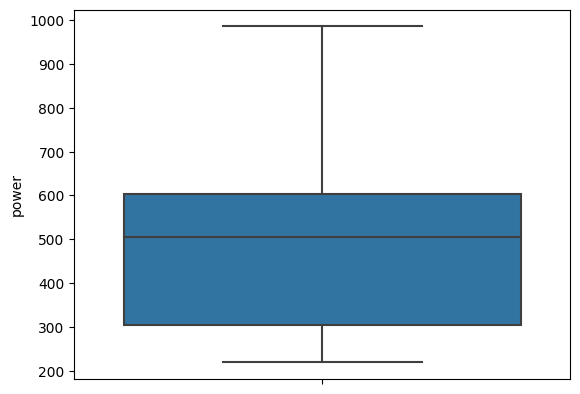

In [4]:
sns.boxplot(y="power", data=data)
plt.show()

**Task**: plot a boxplot in which the distribution of *power* is given for each *day of the week*

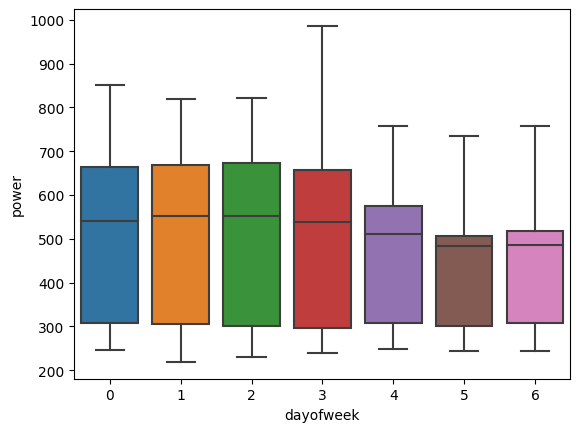

In [26]:
# write your code here:
data['dayofweek'] = data['timestamp'].dt.day_of_week

sns.boxplot(x='dayofweek', y="power", data=data)
plt.show()

**Task**: plot a boxplot in which the distribution of *power* is given for each *month*

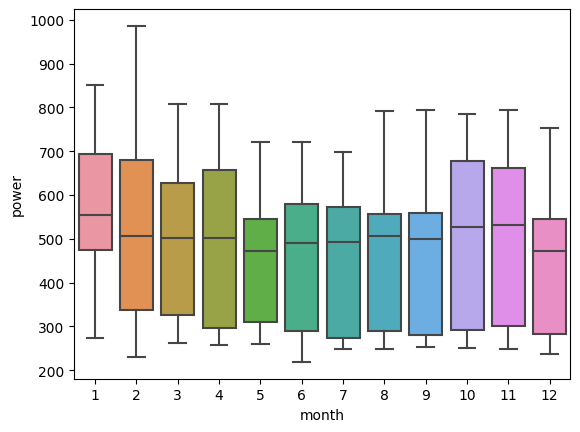

In [27]:
data['month'] = data['timestamp'].dt.month

sns.boxplot(x='month', y="power", data=data)
plt.show()

**Task**: plot a boxplot in which the distribution of *power* is given for each *day of the week* and for each *month*

In [ ]:
# crea un oggetto FacetGrid suddividendo i dati per giorno
g = sns.FacetGrid(data, col="month", col_wrap=4)

# aggiungi un boxplot della variabile "total_bill" su ciascun sotto-plot
g.map(sns.boxplot, "dayofweek", "power")

# mostra il plot
plt.show()

### Introduction to Load Profile visualization for energy-related time series data

Load profile visualization is a critical tool for analyzing and understanding energy-related time series data, such as electricity demand, renewable energy production, and energy consumption patterns. Load profiles display how energy usage varies over time, typically in hourly or sub-hourly intervals, and can provide valuable insights into energy usage patterns, peak demand periods, and opportunities for energy conservation.

Load profile visualization typically involves plotting energy usage data on a graph, with time on the x-axis and energy usage on the y-axis. The resulting graph shows how energy usage changes over time, with peaks indicating periods of high demand and valleys indicating periods of low demand. Load profiles can be used to identify trends and patterns in energy usage, such as daily or weekly cycles, seasonal fluctuations, and changes in energy consumption due to external factors, such as weather events or economic conditions.

Load profiles are a critical tool for energy utilities, businesses, and policymakers to manage energy usage effectively, optimize energy efficiency, and plan for future energy needs. They can be used to identify opportunities for energy conservation, demand response programs, and energy storage solutions, as well as inform decision-making around energy infrastructure investment and development.

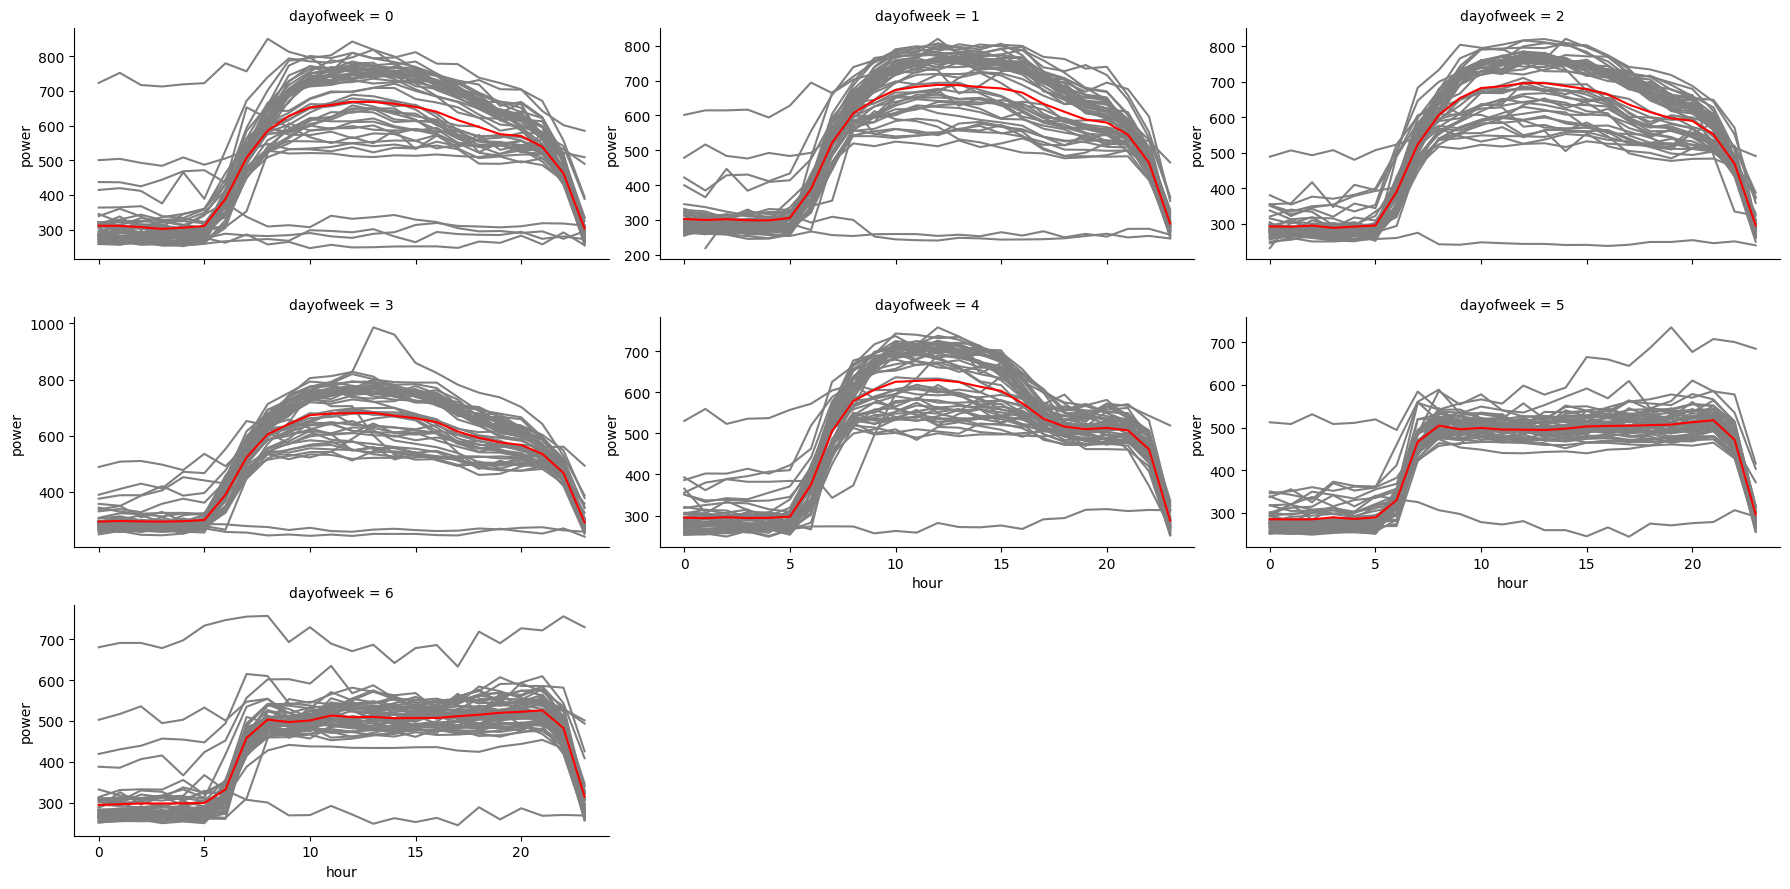

In [7]:
# creating a new DataFrame with the average power for each hour of the day and for each day of the week
data_mean = data.groupby(['dayofweek', 'hour'])['power'].mean().reset_index()

# generating load profiles
g = sns.FacetGrid(data=data, col='dayofweek', hue='date', col_wrap=3, height=3, aspect=2, sharey=False)
g.map(sns.lineplot, 'hour', 'power', color='gray')

# adding average values
for ax, day in zip(g.axes.flatten(), data_mean['dayofweek'].unique()):
    sns.lineplot(x='hour', y='power', data=data_mean[data_mean['dayofweek'] == day], color='r', ax=ax, label='Profilo medio', legend=False)

plt.show()

## Missing values

Handling missing values is critical in time series analytics because they can significantly impact the accuracy and reliability of any analysis or forecasting. If missing values are ignored or improperly handled, it can lead to biased estimates, incorrect conclusions, and inaccurate predictions, which can have serious consequences for decision-making and planning.

Therefore, it is essential to have a comprehensive understanding of the various techniques available to handle missing values in time series data. These techniques range from simple methods like mean imputation or forward filling to more complex techniques like regression imputation, which can incorporate additional predictors to estimate missing values. Choosing the appropriate method depends on the nature of the missing values and the specific context of the analysis.

In summary, handling missing values in time series analytics is crucial to ensure the accuracy and reliability of any analysis or forecasting, and it requires a sound understanding of the available techniques and their appropriate application.

**Task**: count the number of NAs in the column "power" and print the rows in which they are located

In [9]:
# write your code here
missing_values_count = data['power'].isna().sum()

print(f"Number of missing values in column power: {missing_values_count}")

# visualize the rows in which we have missing data
data[data['power'].isna()]

Number of missing values in column power: 12


,timestamp,power,hour,date,dayofweek,month
1075,2017-02-14 19:00:00,NaN,19,2017-02-14,1,2
1076,2017-02-14 20:00:00,NaN,20,2017-02-14,1,2
1077,2017-02-14 21:00:00,NaN,21,2017-02-14,1,2
1078,2017-02-14 22:00:00,NaN,22,2017-02-14,1,2
1079,2017-02-14 23:00:00,NaN,23,2017-02-14,1,2
1682,2017-03-12 02:00:00,NaN,2,2017-03-12,6,3
4075,2017-06-19 19:00:00,NaN,19,2017-06-19,0,6
4076,2017-06-19 20:00:00,NaN,20,2017-06-19,0,6
4077,2017-06-19 21:00:00,NaN,21,2017-06-19,0,6
4078,2017-06-19 22:00:00,NaN,22,2017-06-19,0,6


### Introduction to fillna in Pandas
The fillna method in Pandas is used to fill missing or NaN values in a DataFrame or Series. It can be used to fill NaN values with a constant value, a value computed from neighboring values, or a value computed using a custom function. The fillna method is a powerful tool for handling missing data in Pandas, and it can be used to preprocess data prior to analysis or to clean up data before exporting it to a different file format.

#### Internal methods for filling NaN values
There are several internal methods available in the fillna method that can be used to fill NaN values in a DataFrame or Series. Some of the most commonly used internal methods include:

* **ffill**: This method fills NaN values with the previous non-NaN value. This is also known as a forward fill, as it propagates the last known value forward.

* **bfill**: This method fills NaN values with the next non-NaN value. This is also known as a backward fill, as it propagates the next known value backward.

* **None**: xxx.

These internal methods can be specified as arguments to the fillna method in Pandas. By default, the fillna method fills NaN values with a constant value of 0.0. However, the internal methods can be used to fill NaN values in a more intelligent way based on the surrounding data.

**Task**: select a subset of the dataset which include only two dates "2017-06-19" and "2017-06-20"

In [10]:
# write your code here
data_subset = data.loc[(data['timestamp'] > '2017-06-18 23:59:00') & (data['timestamp'] < '2017-06-21')]

print(data_subset)

               timestamp     power  hour        date  dayofweek  month
4056 2017-06-19 00:00:00  286.6753     0  2017-06-19          0      6
4057 2017-06-19 01:00:00  290.0881     1  2017-06-19          0      6
4058 2017-06-19 02:00:00  289.7468     2  2017-06-19          0      6
4059 2017-06-19 03:00:00  292.4771     3  2017-06-19          0      6
4060 2017-06-19 04:00:00  292.4770     4  2017-06-19          0      6
4061 2017-06-19 05:00:00  284.9689     5  2017-06-19          0      6
4062 2017-06-19 06:00:00  341.2801     6  2017-06-19          0      6
4063 2017-06-19 07:00:00  472.3317     7  2017-06-19          0      6
4064 2017-06-19 08:00:00  557.9930     8  2017-06-19          0      6
4065 2017-06-19 09:00:00  590.0733     9  2017-06-19          0      6
4066 2017-06-19 10:00:00  621.8124    10  2017-06-19          0      6
4067 2017-06-19 11:00:00  623.1775    11  2017-06-19          0      6
4068 2017-06-19 12:00:00  658.3293    12  2017-06-19          0      6
4069 2

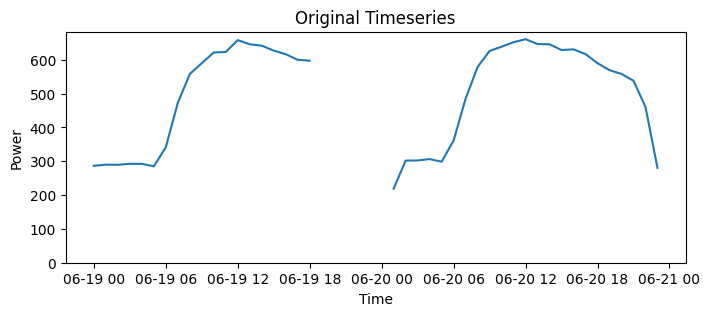

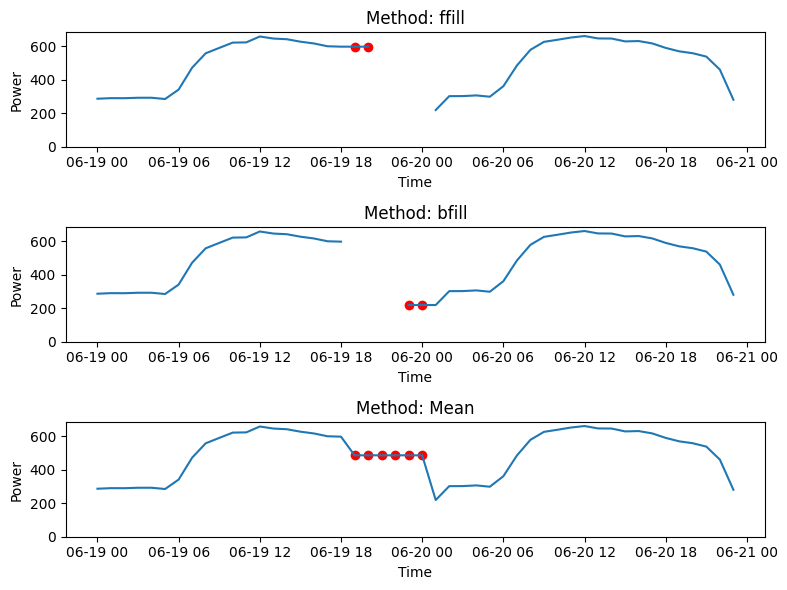

In [11]:
fig, ax = plt.subplots(nrows=1,figsize=(8, 3))
ax.plot(data_subset['timestamp'], data_subset['power'], label='Original')
ax.set_title('Original Timeseries')
ax.set_ylabel('Power')
ax.set_xlabel('Time')
ax.set_ylim([0, None])

methods = ['ffill', 'bfill', 'Mean']
# optional
threshold = 2
fig, axes = plt.subplots(nrows=len(methods), figsize=(8, 6))

for i, method in enumerate(methods):
    # fill NaN values using specified method
    filled_data = data.copy()
    if method != 'Mean':
        filled_data['power'] = filled_data['power'].fillna(method=method, limit=threshold)
    else:
        filled_data['power'] = filled_data['power'].fillna(data['power'].mean())
    filled_data_subset = filled_data.loc[(filled_data['timestamp'] > '2017-06-18 23:59:00') & (filled_data['timestamp'] < '2017-06-21')]
    # plot reconstructed timeseries
    axes[i].plot(filled_data_subset['timestamp'], filled_data_subset['power'])
    axes[i].scatter(filled_data_subset['timestamp'][data_subset['power'].isnull()], 
                    filled_data_subset['power'][data_subset['power'].isnull()], color='r')
    axes[i].set_title(f"Method: {method}")
    axes[i].set_ylabel('Power')
    axes[i].set_xlabel('Time')
    axes[i].set_ylim([0, None])
    
plt.tight_layout()
plt.show()


### Introduction to moving average and rolling function

A common method for filling missing data is to use a moving average, which is a statistical technique that calculates the average of a subset of values over a specified window of time or observations. The rolling function in pandas can be used to perform this calculation efficiently on a time series or a dataframe.

The rolling function takes a window size as input and applies a rolling window calculation to a specified column of the dataframe. The window size defines the number of consecutive values to include in each rolling calculation.

**Tip** play with *window size* to understand its functioning

(0.0, 683.15749)

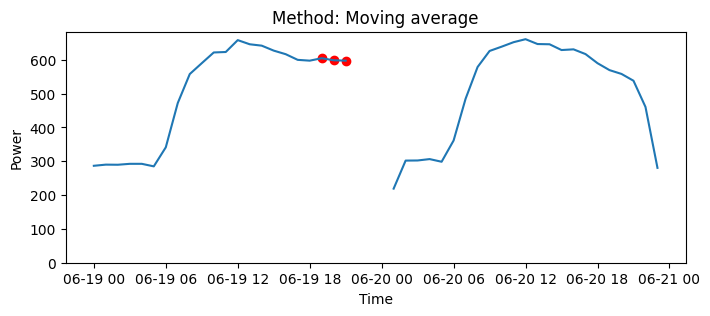

In [12]:
# create a copy of the data
filled_data = data.copy()

# set window size
window_size = 4

# calculate the rolling mean over a window of size 'window_size'
filled_data['power'] = filled_data['power'].fillna(filled_data['power'].rolling(window_size, min_periods=1).mean())

filled_data_subset = filled_data.loc[(filled_data['timestamp'] > '2017-06-18 23:59:00') & (filled_data['timestamp'] < '2017-06-21')]

fig, ax = plt.subplots(nrows=1,figsize=(8, 3))
ax.plot(filled_data_subset['timestamp'], filled_data_subset['power'], label='Original')
ax.scatter(filled_data_subset['timestamp'][data_subset['power'].isnull()], 
                    filled_data_subset['power'][data_subset['power'].isnull()], color='r')
ax.set_title('Method: Moving average')
ax.set_ylabel('Power')
ax.set_xlabel('Time')
ax.set_ylim([0, None])


### Introduction to interpolate

In pandas, the interpolate() method provides a way to fill in missing values by using interpolation. Interpolation is a technique for estimating values for missing data points based on the values of neighboring data points.

The interpolate() method computes linear interpolation by default, but other interpolation methods such as quadratic and cubic can also be used. The method works by examining the values in a Series or DataFrame, and filling in the missing values based on the values of neighboring data points.

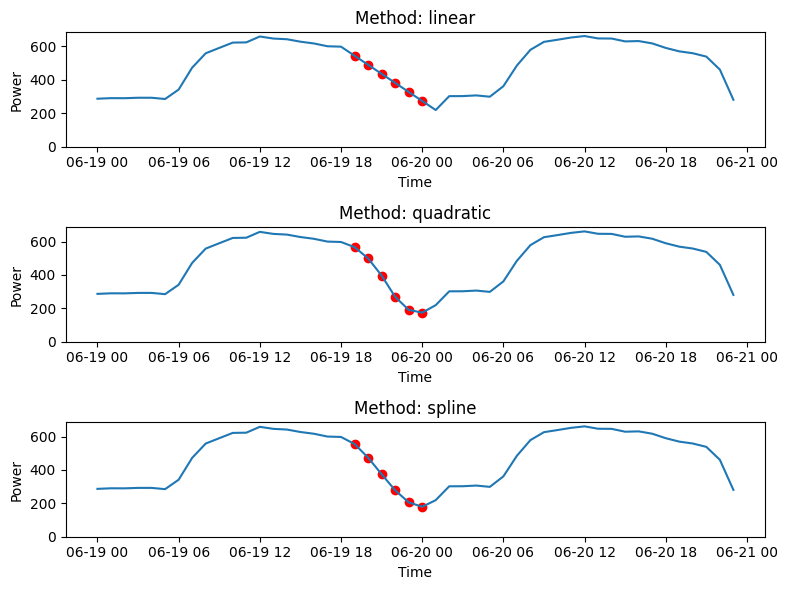

In [19]:


methods = ['linear', 'quadratic', 'spline']
# optional
threshold = 6
fig, axes = plt.subplots(nrows=len(methods), figsize=(8, 6))

for i, method in enumerate(methods):
    # fill NaN values using specified method
    filled_data = data.copy()
    filled_data['power'].interpolate(method=method,limit=threshold, inplace=True, order=3)
    filled_data_subset = filled_data.loc[(filled_data['timestamp'] > '2017-06-18 23:59:00') & (filled_data['timestamp'] < '2017-06-21')]
    # plot reconstructed timeseries
    axes[i].plot(filled_data_subset['timestamp'], filled_data_subset['power'])
    axes[i].scatter(filled_data_subset['timestamp'][data_subset['power'].isnull()], 
                    filled_data_subset['power'][data_subset['power'].isnull()], color='r')
    axes[i].set_title(f"Method: {method}")
    axes[i].set_ylabel('Power')
    axes[i].set_xlabel('Time')
    axes[i].set_ylim([0, None])
    
plt.tight_layout()
plt.show()


## Outlier detection

Outliers are data points that deviate significantly from the rest of the data. Outliers can occur due to measurement errors, data entry errors, or simply due to the inherent variability of the data. Identifying outliers is an important step in data analysis, as they can have a significant impact on statistical estimates and machine learning models.

### Z-score method

One way to detect outliers is to use the z-score method, which identifies data points that are more than a certain number of standard deviations away from the mean. The z-score is calculated as the difference between a data point and the mean, divided by the standard deviation.

**Task**: calculate *z_scores* for power column. Identify outliers and print them on the original time series with red dots.

200     850.4700
201     812.9292
204     810.1990
207     811.9054
254     821.1199
444     827.6043
445     810.5402
540     842.6206
541     819.0722
588     816.3420
589     811.2228
612     819.4135
709     819.0722
732     820.0961
876     809.8577
924     816.6833
925     820.4374
926     809.5164
947     812.2466
948     826.9217
949     985.9582
950     960.0209
951     859.0020
952     823.5089
1261    808.8338
Name: power, dtype: float64


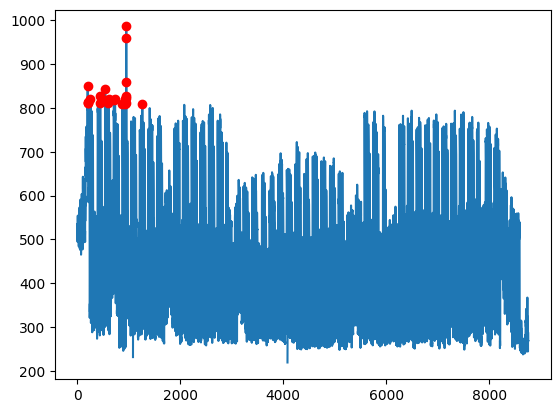

In [22]:
# calculate z-scores for each column
z_scores = (data['power'] - data['power'].mean()) / data['power'].std()

# define std limit (default 3)
std_limit = 3

# identify outliers as data points with z-score greater than std_limit or less than -std_limit
outliers = data['power'][(z_scores > std_limit) | (z_scores < -std_limit)]

print(outliers)

# plot column 'a' with outlier in red
plt.plot(data['power'])
plt.plot(outliers.index, data.loc[outliers.index, 'power'], 'ro')
plt.show()

### Interquartile or boxplot method

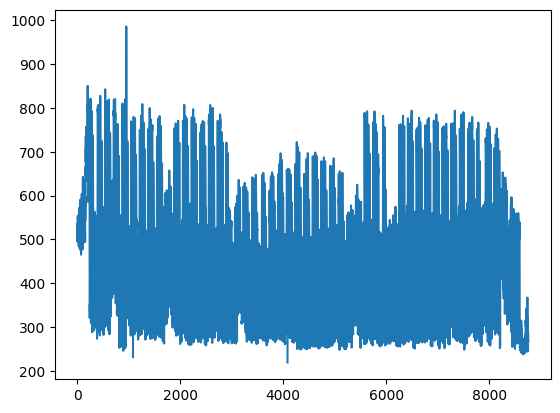

In [34]:
# evaluate 1st quartile
Q1 = data['power'].quantile(0.25)

# evalutate 3rd quartile
Q3 = data['power'].quantile(0.75)

# evaluate interquartile
IQR = Q3 - Q1

# define IQR limit (default 1.5)
IQR_limit = 1.5

# identify and highlight outliers
outliers = data['power'][(data['power'] < Q1 - IQR_limit*IQR) | (data['power'] > Q3 + IQR_limit*IQR)]

plt.plot(data['power'])
plt.plot(outliers.index, data.loc[outliers.index, 'power'], 'ro')
plt.show()